In [19]:
#Load all the required python libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

You have to forecast the sales of the products for the end of the quarter helps us set realistic revenue targets, plan campaigns, and track performance early.

**Load the data**

In [5]:
df= pd.read_csv('../input/global-superstore-datasets/GlobalSuperstoreData.csv')
df.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


**Study the data, information about the data, its data type**

In [6]:
#information abot data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [7]:
df.shape

(51290, 5)

In [9]:
#summary about numeric columns:
df.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


**Data Cleaning**

Prepare the data ready for building model and visualization, which is an essential step in building Forecasting model.

In [10]:
df['Market_Segment']= df['Market']+'_' +df['Segment']
df.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US_Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa_Consumer


In [11]:
df.nunique().sort_values()

Segment               3
Market                7
Market_Segment       21
Order Date         1430
Sales             22995
Profit            24575
dtype: int64

Lets observe the Unique market segments, customer segments and Market-Segments

Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64


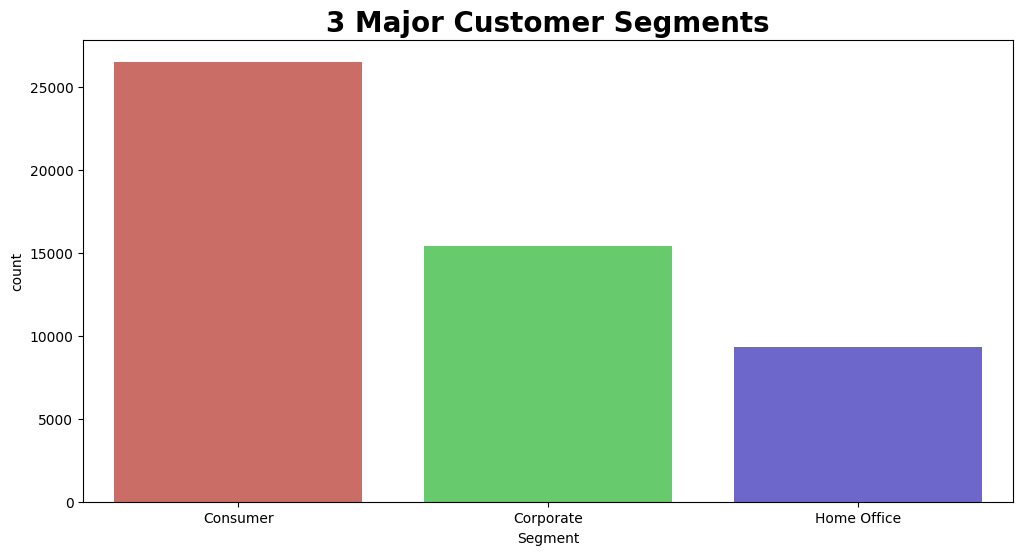

In [24]:
plt.figure(figsize=(12,6))
print(df.Segment.value_counts())
df['Segment'] = df['Segment'].astype(str)
sns.countplot(data=df, x= df['Segment'],palette='hls')
plt.title('3 Major Customer Segments',fontweight='bold', size=20)
plt.show()

Market
APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: count, dtype: int64


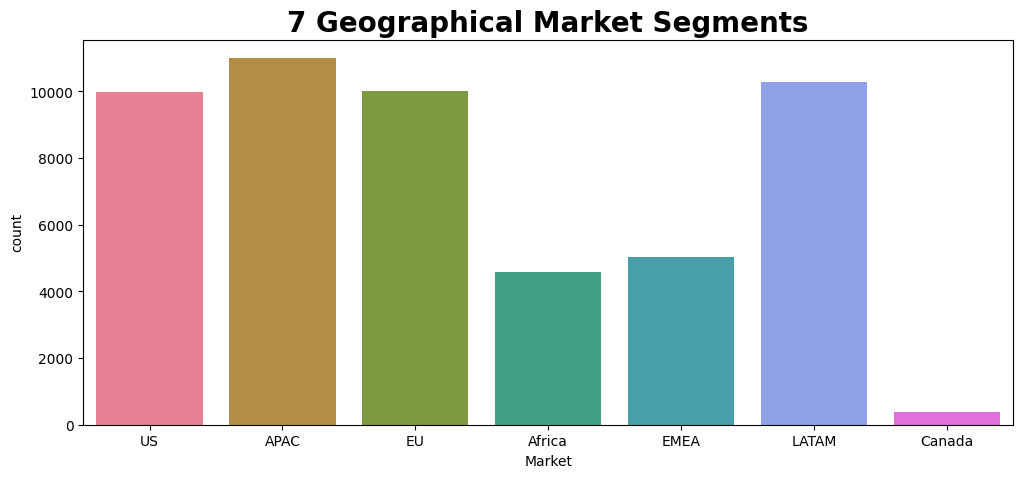

In [25]:
plt.figure(figsize=(12,5))
print(df.Market.value_counts())
df['Market'] = df['Market'].astype(str)
sns.countplot(data=df,x=df['Market'], palette='husl')
plt.title('7 Geographical Market Segments', fontweight='bold', size=20)
plt.show()

Market_Segment
APAC_Consumer         5699
LATAM_Consumer        5321
US_Consumer           5191
EU_Consumer           5186
APAC_Corporate        3283
EU_Corporate          3077
LATAM_Corporate       3053
US_Corporate          3020
EMEA_Consumer         2538
Africa_Consumer       2381
APAC_Home Office      2020
LATAM_Home Office     1920
US_Home Office        1783
EU_Home Office        1737
EMEA_Corporate        1574
Africa_Corporate      1312
EMEA_Home Office       917
Africa_Home Office     894
Canada_Consumer        202
Canada_Corporate       110
Canada_Home Office      72
Name: count, dtype: int64


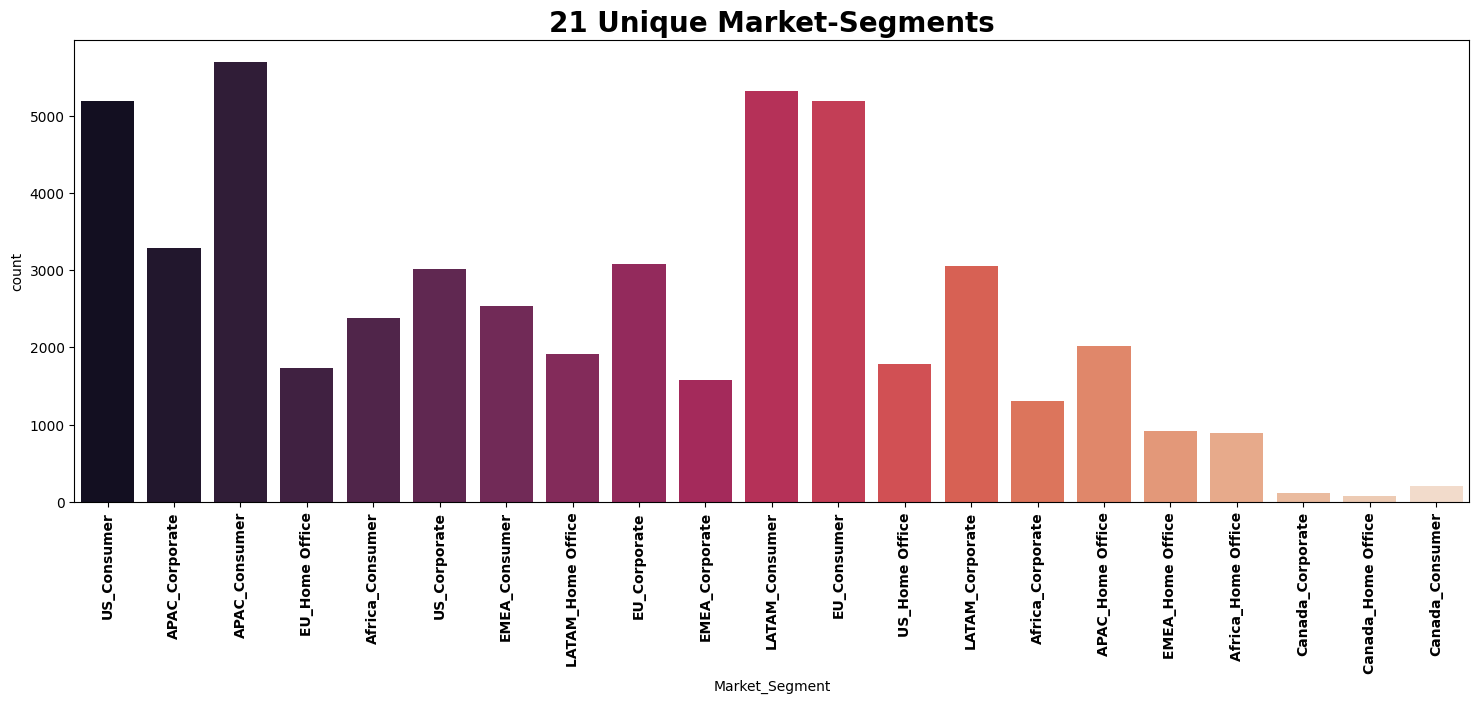

In [27]:
plt.figure(figsize=(18,6))
print(df.Market_Segment.value_counts())
df['Market_Segment'] = df['Market_Segment'].astype(str)
sns.countplot(data=df, x=df['Market_Segment'], palette='rocket')
plt.title('21 Unique Market-Segments',fontweight='bold', size=20)
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

From the above plot, we can see that APC_Consumer has the highest count

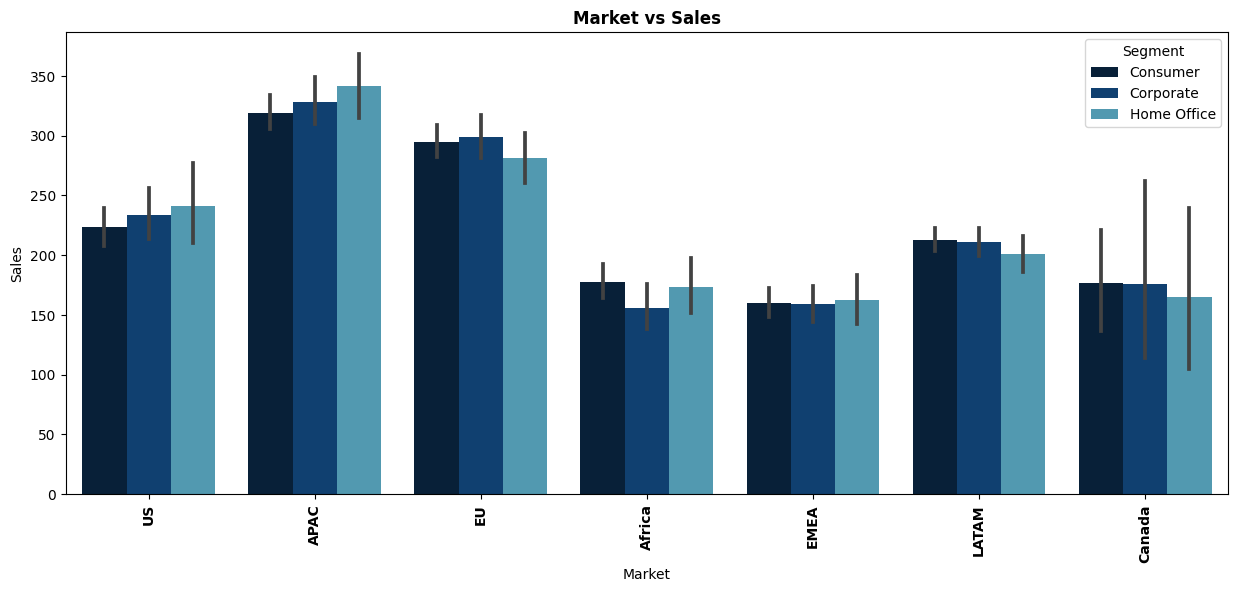

In [31]:
#MArket_Segment versus Sales
plt.figure(figsize=(15,6))
sns.barplot(x='Market', y= 'Sales', hue='Segment', data=df, palette='ocean')
plt.title('Market vs Sales', fontweight='bold')
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

EMEA and Africa have less sales,APAC marketis having higher Sales in all the three segments.

In [35]:
#droping column Market and segment:
df1=df
df1.head()
df=df.drop(['Market','Segment'],axis=1)
df.head()

,Order Date,Sales,Profit,Market_Segment
0,31-07-2012,2309.650,762.1845,US_Consumer
1,05-02-2013,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,5175.171,919.9710,APAC_Consumer
3,28-01-2013,2892.510,-96.5400,EU_Home Office
4,05-11-2013,2832.960,311.5200,Africa_Consumer


In [36]:
#changing order-date into a date-time format for getting it into the Month-year format
df['Order Date'] = pd.to_datetime(df['Order Date']).dt.to_period('m')
df= df.sort_values(by=['Order Date'])
df.head()

,Order Date,Sales,Profit,Market_Segment
30643,2011-01,60.9600,28.6400,LATAM_Consumer
48527,2011-01,19.3000,5.7900,US_Consumer
29861,2011-01,51.6285,4.5885,APAC_Home Office
29871,2011-01,47.9600,15.8000,LATAM_Consumer
16508,2011-01,176.6808,-156.6792,APAC_Consumer


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51290 entries, 30643 to 44106
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   Order Date      51290 non-null  period[M]
 1   Sales           51290 non-null  float64  
 2   Profit          51290 non-null  float64  
 3   Market_Segment  51290 non-null  object   
dtypes: float64(2), object(1), period[M](1)
memory usage: 2.0+ MB


In [38]:
#Monthly wise aggregated transaction data:
store_profit= df.pivot_table( index='Order Date',values='Profit', columns='Market_Segment' ,aggfunc='sum')
store_profit.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


In [39]:
store_profit.shape

(48, 21)

So,for 21 MArket_Segment we have profit data for total 48 months


**Split the data into train and test data:**

In [41]:
# lets take the 42 months for train data and 6 months for the test data.
train_len = 42
train_df= store_profit[0:train_len] # first 42 months as training set
test_df= store_profit[train_len:] # last 6 months as test set

In [42]:
train_df.shape

(42, 21)

In [44]:
test_df.shape

(6, 21)

In [45]:
train_df.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


In [46]:
test_df.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2014-07,2732.4828,2874.3051,2064.9264,737.898,485.172,1249.146,14.76,2.52,10.80,-144.951,...,720.714,2632.2150,2315.9265,-692.5320,2129.27468,2173.15444,1294.15156,1579.2611,3468.5608,1575.7352
2014-08,5050.6929,1722.2874,2211.4455,3934.101,-66.864,1067.970,321.18,71.13,144.96,2232.021,...,-80.568,8045.1225,5136.6645,5403.2130,4083.28768,1716.99348,1278.36240,2674.2465,4667.7445,1552.4576
2014-09,5758.2162,5392.7694,7290.0429,3345.822,-387.165,765.531,194.25,289.20,63.48,2770.461,...,-257.274,7567.2075,10510.5540,2738.3475,5827.53088,2256.83932,2540.53700,5994.5028,3151.8333,2249.1033
2014-10,11824.2486,4155.1648,5850.4515,2278.191,2678.727,-103.149,299.13,385.41,NaN,588.738,...,510.654,6378.0075,2336.6700,2261.6820,3900.67532,3006.86876,1961.82448,2546.1627,2863.3104,4031.1877
2014-11,12869.9883,5693.9367,5344.7532,3824.202,-217.344,3060.981,183.06,4.05,86.64,1237.902,...,-73.785,6922.0860,3867.5235,1294.1535,5063.50480,2211.00024,1363.85176,6629.4842,749.1913,2303.8764


In [52]:
#Convert the Order-Date column from "DateTime" to "timestamp"
df['Order Date'].dtype


period[M]

In [54]:
df['Order Date'] = df['Order Date'].astype(str)
df['Order Date']=pd.to_datetime(df['Order Date'])

In [55]:
#timestamp for each order date 
df['Order Date'].dtype

dtype('<M8[ns]')

In [56]:
#Filter out the Data for Best Market Segment- APAC Consumer:
#Drop the data for other 20 market segments and keep only the one for the market segment 
#that you found to be the most consistently profitable.
retail_df= df[(df.Market_Segment=='APAC_Consumer')]
retail_df.head()

,Order Date,Sales,Profit,Market_Segment
16508,2011-01-01,176.6808,-156.6792,APAC_Consumer
24801,2011-01-01,69.3000,3.4200,APAC_Consumer
16608,2011-01-01,219.9600,8.7600,APAC_Consumer
9787,2011-01-01,337.6395,-122.8005,APAC_Consumer
29891,2011-01-01,30.4560,12.0960,APAC_Consumer


In [57]:
retail_df.shape

(5699, 4)

In [58]:
#Grouping the data based on Order Date and sales
data=pd.DataFrame(retail_df.groupby("Order Date")['Sales'].sum())
data.head()


,Sales
Order Date,
2011-01-01,15711.7125
2011-02-01,12910.8588
2011-03-01,19472.5632
2011-04-01,15440.3046
2011-05-01,24348.9723


**Time Series Analysis through visualization:**

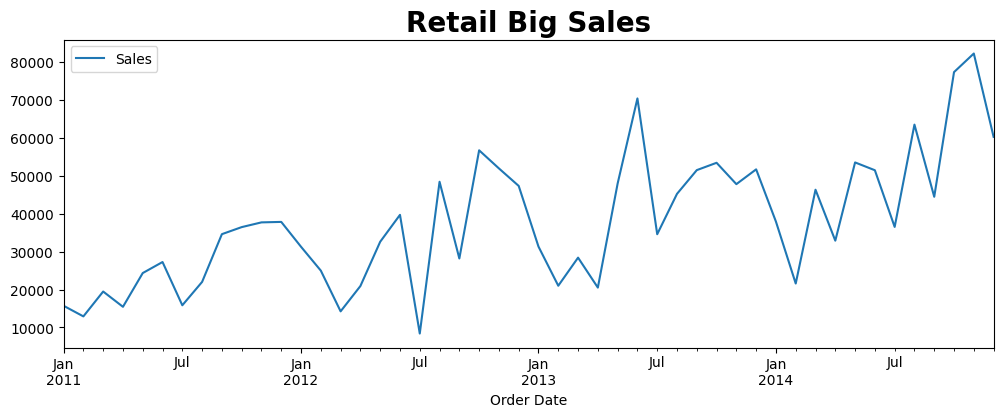

In [60]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Big Sales', fontweight='bold', size=20)
plt.show(block=False)

In [61]:
data.isnull().sum()

Sales    0
dtype: int64

In [63]:
#Spilting the time series data into training and testing data
train_len = 42
train_dff= data[0:train_len] 
test_dff= data[train_len:] 

Time series Decomposition
Lets see how a time series can be split into its various components such as  Trend, Seasonality, and residuals

seasonal decomposition where each individual components can be added to get the time-series data

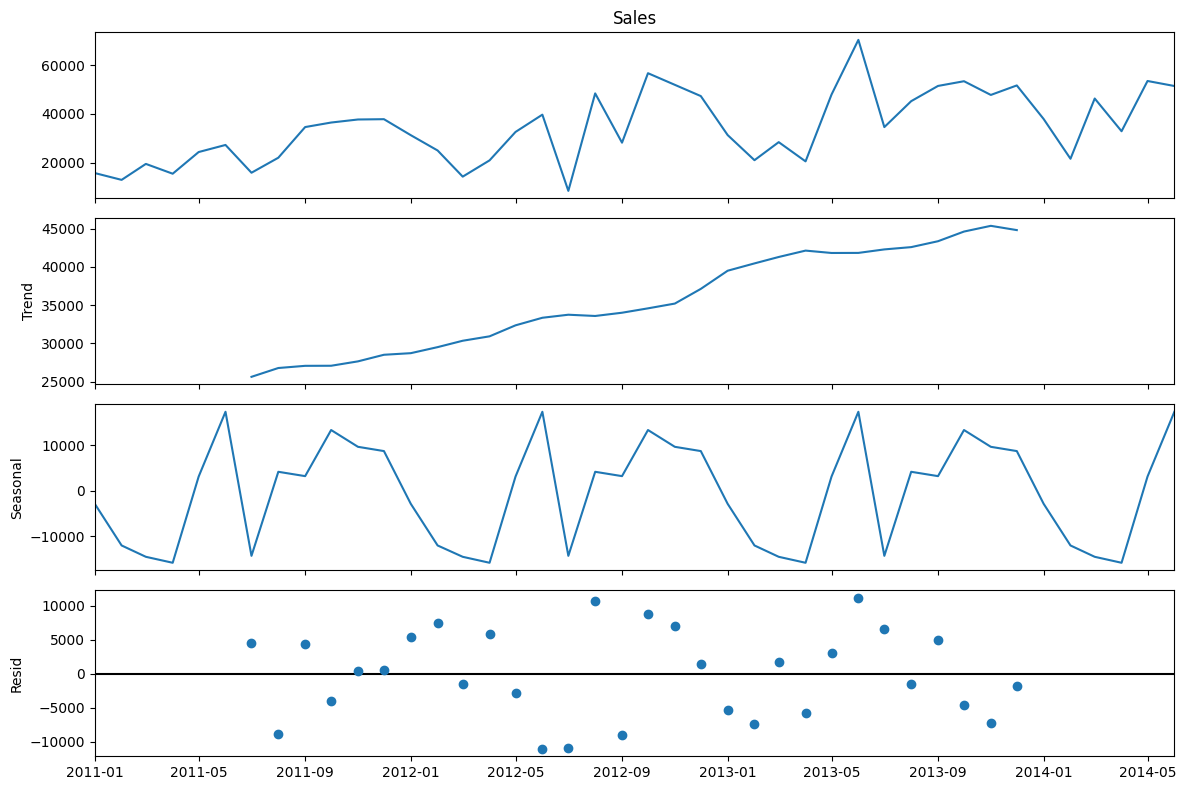

In [65]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(train_dff.Sales, model='additive') # additive seasonal index

fig = decomposition.plot()
plt.show()

Build a Forecasting Model:
Here I have used time series naive method to derive the last month's sale

**Naive Method(Last Period):**
This method assumes that the number of customers will be the same as in the last period (e.g., last quarter).

It's useful when we don’t expect much change over the short term.
Usecase:
When there is no change in trend or seasonality, and customer behavior is stable.

In [66]:
y_naive=test_dff.copy()
y_naive['Naive_Forecast'] = train_dff['Sales'][train_len-1]

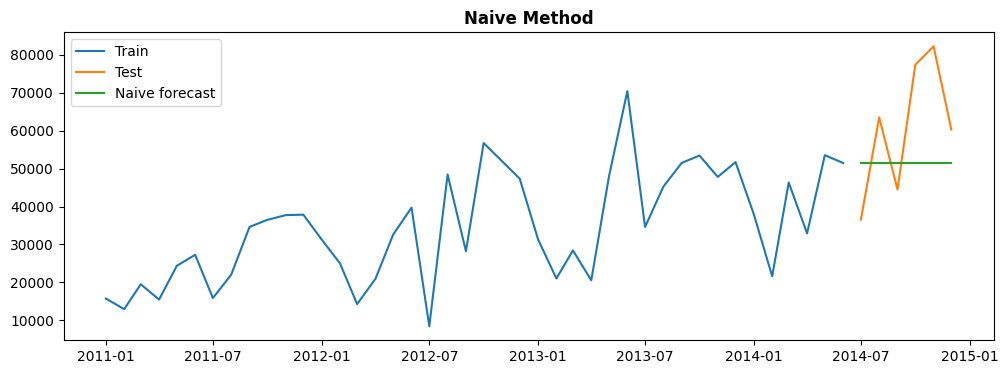

In [67]:
#Plot Naive Forecast:
plt.figure(figsize=(12,4))
plt.plot(train_dff['Sales'], label='Train')
plt.plot(test_dff['Sales'], label='Test')
plt.plot(y_naive['Naive_Forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method', fontweight= 'bold')
plt.show()

Here as we can see in the plot,in order to forecast the sales from month 2014-07 to 2015-01,the last or previous month data which is 2014-06
#### We can see that the forecast for the next six months is the same value(shown in the green line) as the last observation of the blue line

In [68]:
#Calculate RMSE and MAPE:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_dff['Sales'], y_naive['Naive_Forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_dff['Sales']-y_naive['Naive_Forecast'])/test_dff['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86


Naive Method(Simple moving average method):
A simple method where you take the average of the previous n periods (months, quarters).

Can be adjusted by using weighted averages (e.g., giving more weight to recent periods).
Forecast= Average of only the last few observations to forecast the future

Reduces unsystematic noise in the data

In [69]:
y_sma = data.copy()
# Considered 3 month window i.e a quarter
ma_window = 3  
y_sma['sma_forecast'] = data['Sales'].rolling(ma_window).mean()
y_sma['sma_forecast'][train_len:] = y_sma['sma_forecast'][train_len-1]

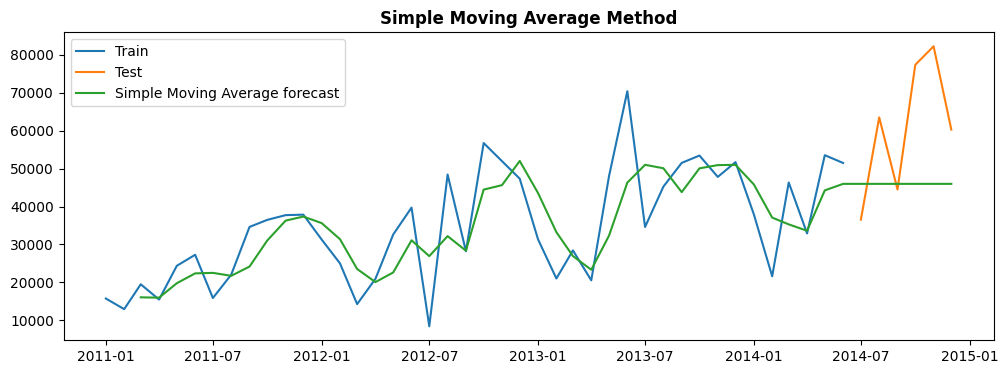

In [70]:
#Plot Naive Simple Moving Average:
plt.figure(figsize=(12,4))
plt.plot(train_dff['Sales'], label='Train')
plt.plot(test_dff['Sales'], label='Test')
plt.plot(y_sma['sma_forecast'], label='Simple Moving Average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method', fontweight= 'bold')
plt.show()

For the forecast of months from 2014-07 to 2015-01 
Green line is the average of all the 42 months sales data
 we forecasted that there is no change in  any trend or seasonality while our train and test data had both trend and seasonality

In [71]:
#Calculate RSME and MAPE for Sim
rmse = np.sqrt(mean_squared_error(test_dff['Sales'], y_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test_dff['Sales']-y_sma['sma_forecast'][train_len:])/test_dff['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple moving average forecast,22019.48,27.55


**Holt's Exponential Smoothing**

In [76]:
#With trend and without Season

from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train_dff['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_holt = test_dff.copy()
y_holt['holt_forecast'] = model_fit.forecast(len(test_dff))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 10555.930159999996, 'initial_trend': 2155.007810909092, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


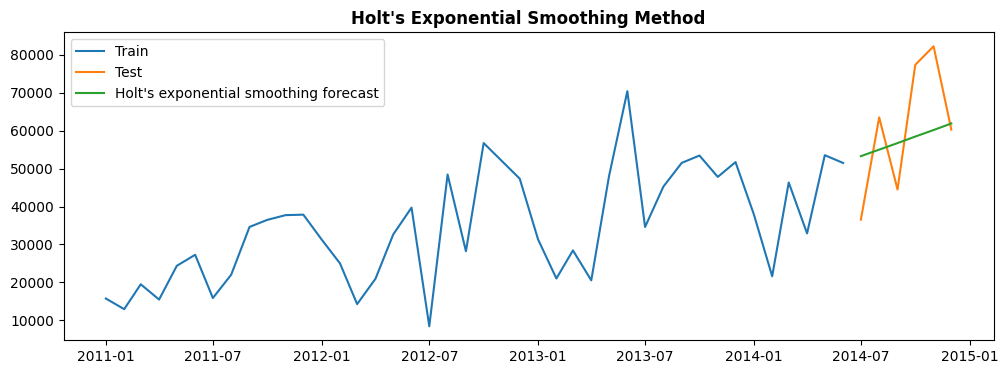

In [77]:
plt.figure(figsize=(12,4))
plt.plot( train_dff['Sales'], label='Train')
plt.plot(test_dff['Sales'], label='Test')
plt.plot(y_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method', fontweight='bold')
plt.show()

Its clear from plot that, the forecast is a straight line, sloping upwards as Holt's method captured both level and trend(without seasonal variation).

In [78]:
#Calcualte RSME and MAPE
rmse = np.sqrt(mean_squared_error(test_dff['Sales'], y_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_dff['Sales']-y_holt['holt_forecast'])/test_dff['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple moving average forecast,22019.48,27.55
0,Holt's exponential smoothing method,15014.67,23.47


Holt Winter's Additive Method Forecasts based on level, trend and seasonality of a time series

In [82]:
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
y_holtwa = test_dff.copy()
model = ExponentialSmoothing(np.asarray(train_dff['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_holtwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.0050230186320624915, 'smoothing_trend': 0.0050230186320624915, 'smoothing_seasonal': 9.999537319276889e-05, 'damping_trend': nan, 'initial_level': 25189.03092964937, 'initial_trend': 508.64498509737217, 'initial_seasons': array([ -3047.16537145, -12233.93320003, -14733.321917  , -16050.11506026,
         2962.06850075,  17240.85289788, -17814.05718573,   4803.72890472,
          624.04678121,  15535.86988862,  13175.04447425,   9534.12743931]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


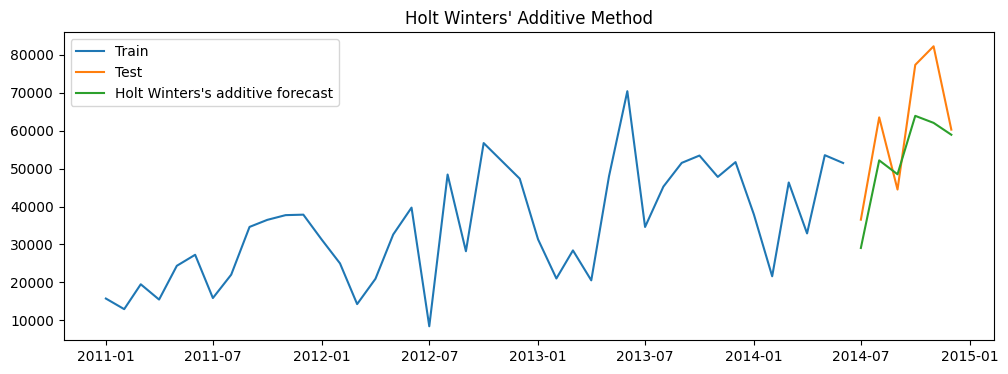

In [83]:
plt.figure(figsize=(12,4))
plt.plot( train_dff['Sales'], label='Train')
plt.plot(test_dff['Sales'], label='Test')
plt.plot(y_holtwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

It is clear from above observation that we are able to see variation in trend and seasonality.

In [84]:
rmse = np.sqrt(mean_squared_error(test_dff['Sales'], y_holtwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_dff['Sales']-y_holtwa['hw_forecast'])/test_dff['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple moving average forecast,22019.48,27.55
0,Holt's exponential smoothing method,15014.67,23.47
0,Holt Winters' additive method,11490.56,15.26


Holt Winter's multiplicative method :
with trend and seasonality


In [85]:
y_hwm = test_dff.copy()
model = ExponentialSmoothing(np.asarray(train_dff['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.005, 'smoothing_trend': 0.005, 'smoothing_seasonal': 0.07107142857142858, 'damping_trend': nan, 'initial_level': 25191.87885499998, 'initial_trend': 549.1511154545476, 'initial_seasons': array([0.93074061, 0.67529696, 0.57227633, 0.57532186, 1.06552983,
       1.42137084, 0.42860295, 1.11971051, 1.04228985, 1.47741289,
       1.40453147, 1.28691591]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


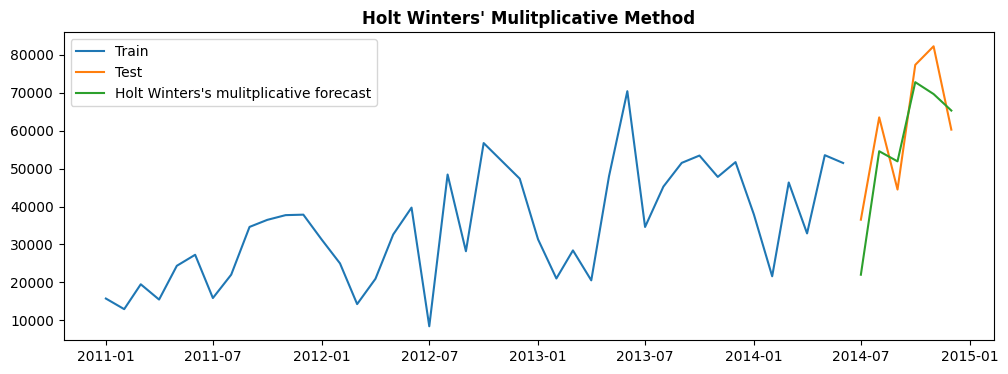

In [86]:
plt.figure(figsize=(12,4))
plt.plot( train_dff['Sales'], label='Train')
plt.plot(test_dff['Sales'], label='Test')
plt.plot(y_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method', fontweight='bold')
plt.show()

In [87]:
#Calcultae RSME and MAPE
rmse = np.sqrt(mean_squared_error(test_dff['Sales'], y_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_dff['Sales']-y_hwm['hw_forecast'])/test_dff['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple moving average forecast,22019.48,27.55
0,Holt's exponential smoothing method,15014.67,23.47
0,Holt Winters' additive method,11490.56,15.26
0,Holt Winters' multiplicative method,9585.23,16.69


It is clear from RSME and MAPE result table that Holt winter's additive method has lowest value of MAPE, which signifies that the error measure in this model is less as compared to the other three models.

Conclusion:
 Holt Winters additive method is the best forecasting method in the smoothing technique.